### Práctica de Web Scraping

Se va a considerar una de las páginas vista en la teoría que contiene fotos de trenes:https://www.vialibre-ffe.com/multi_foto.asp?cs=mult. En esta página aparece un menú con varios grupos de fotos de trenes. A su vez, cada grupo contiene un conjunto de subgrupos de fotos. Por ejemplo, el grupo __Renfe operadora__ se encuentra en la página https://www.vialibre-ffe.com/multi_ind_fotos.asp?cat=mu01.

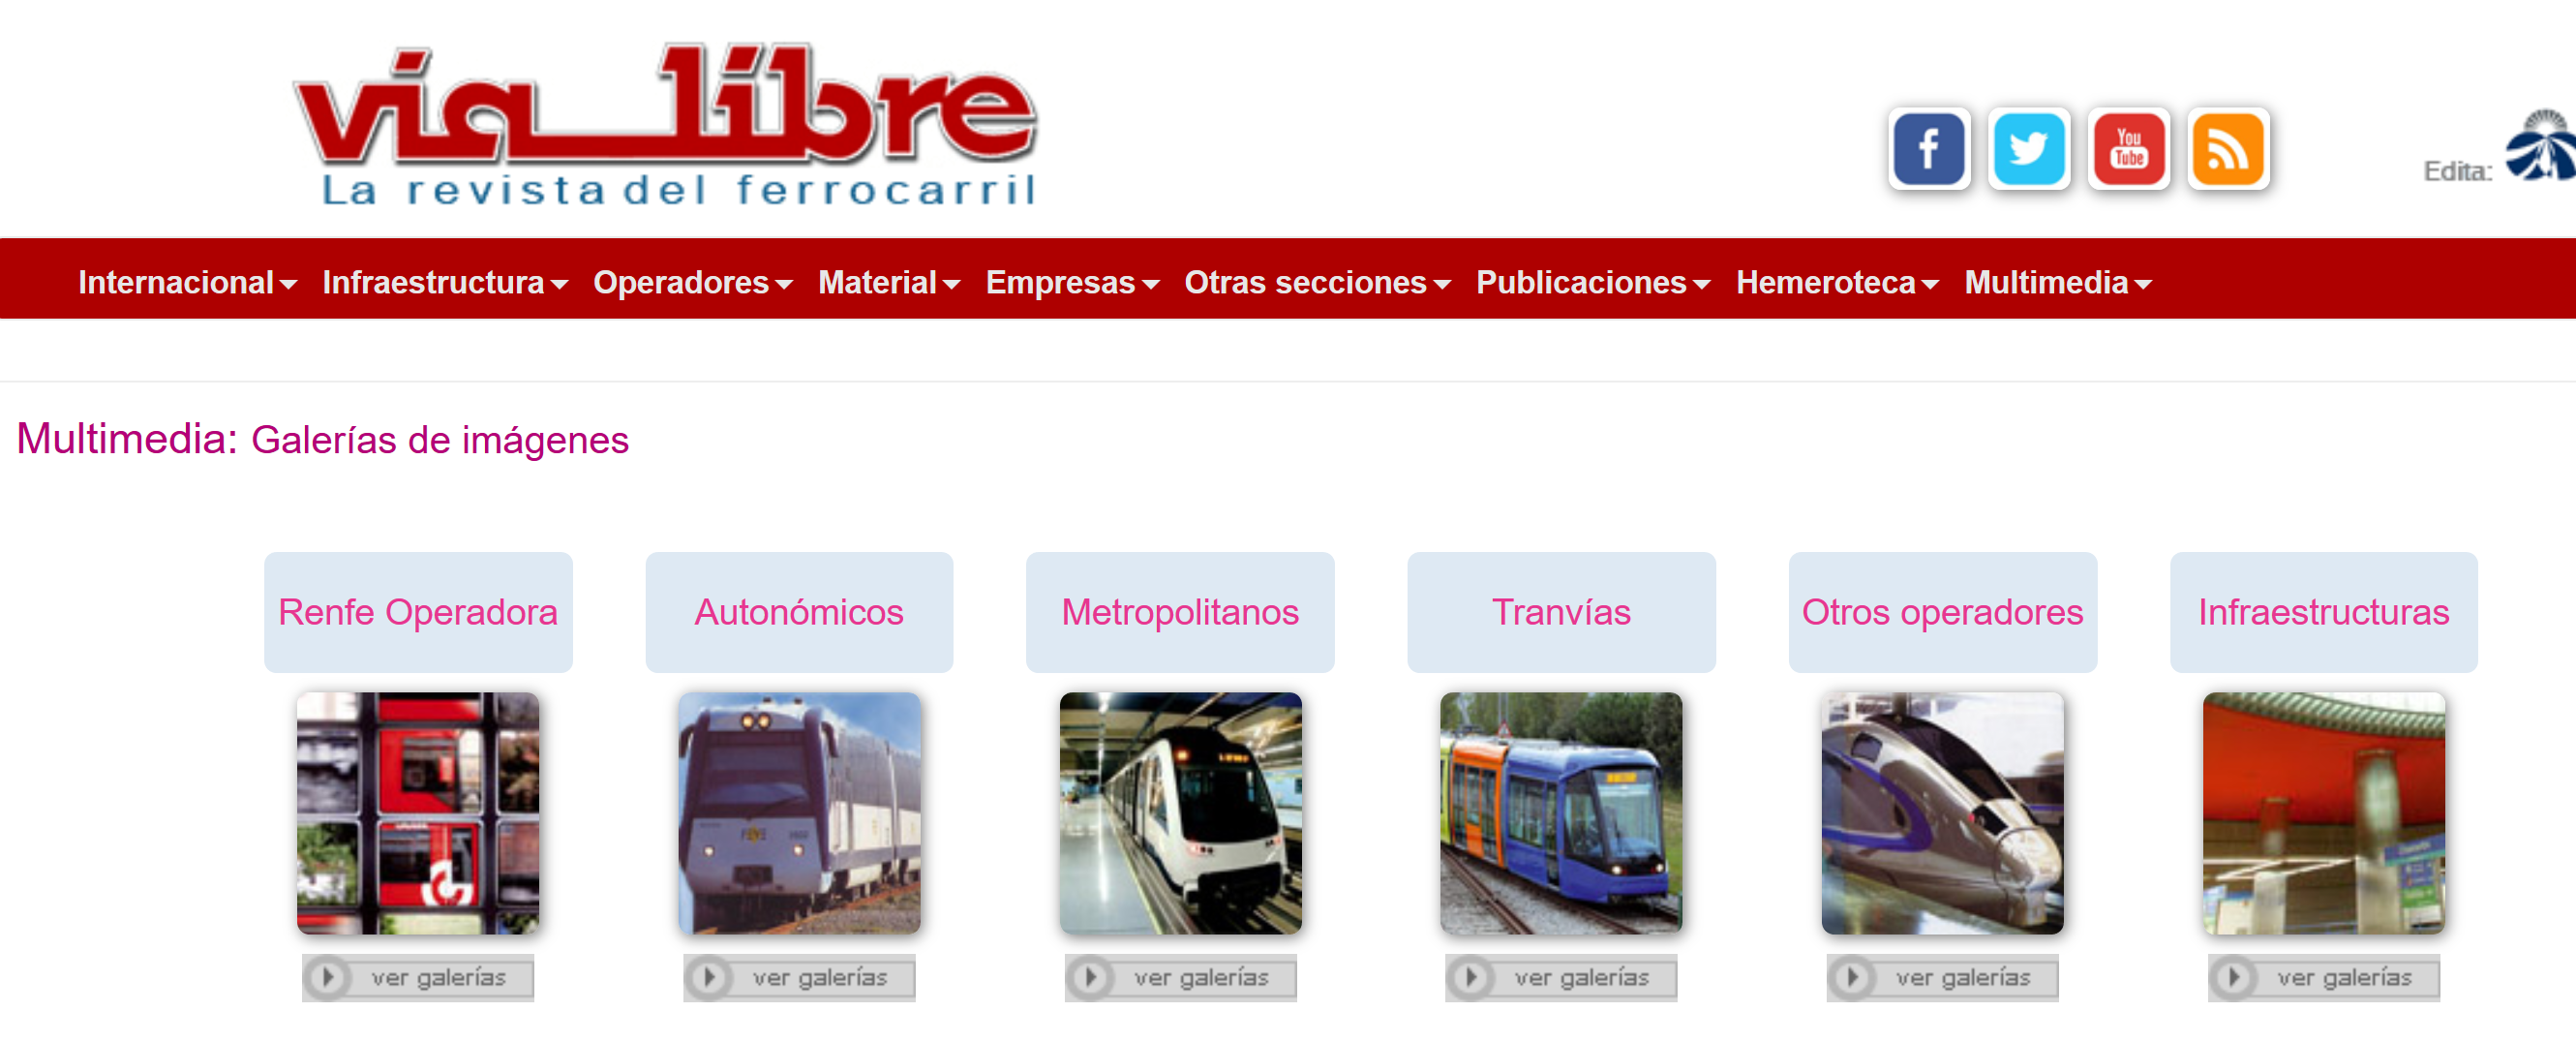

In [4]:
from IPython.display import Image
Image(filename='Captura1.png')

Dentro de este grupo por ejemplo se encuentra el subgrupo __Serie120 en Irún-Hendaya__ en la página https://www.vialibre-ffe.com/multi_galeria.asp?gal=524. 

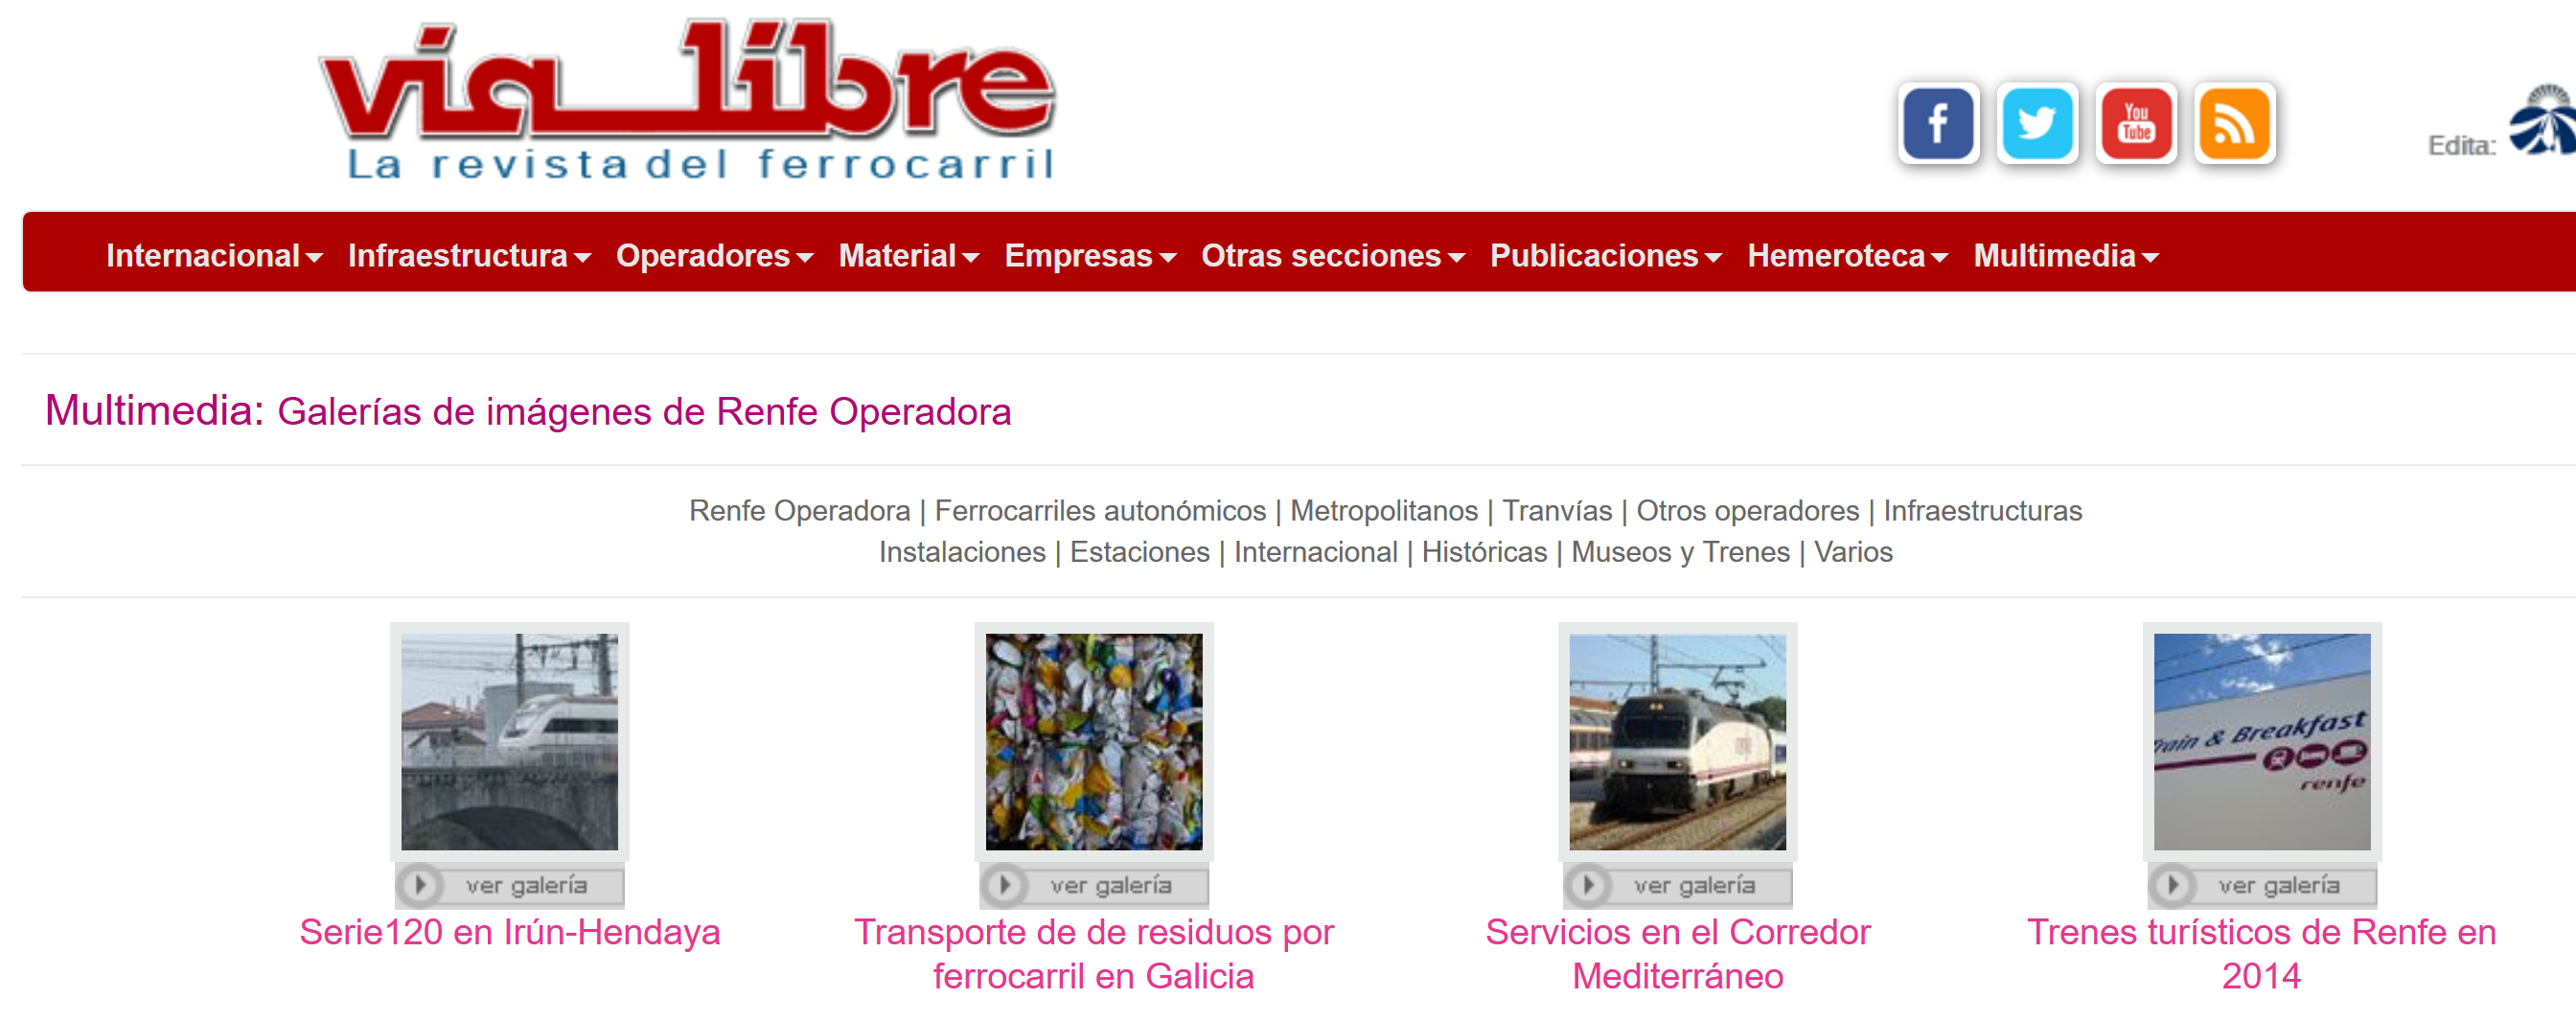

In [8]:
from IPython.display import Image
Image(filename='Captura2.png')

En dicho subgrupo se encuentran las imágenes de dicho subgrupo. Por ejemplo, a continuación, se muestra una de las imágenes del subgrupo __Serie120 en Irún-Hendaya__

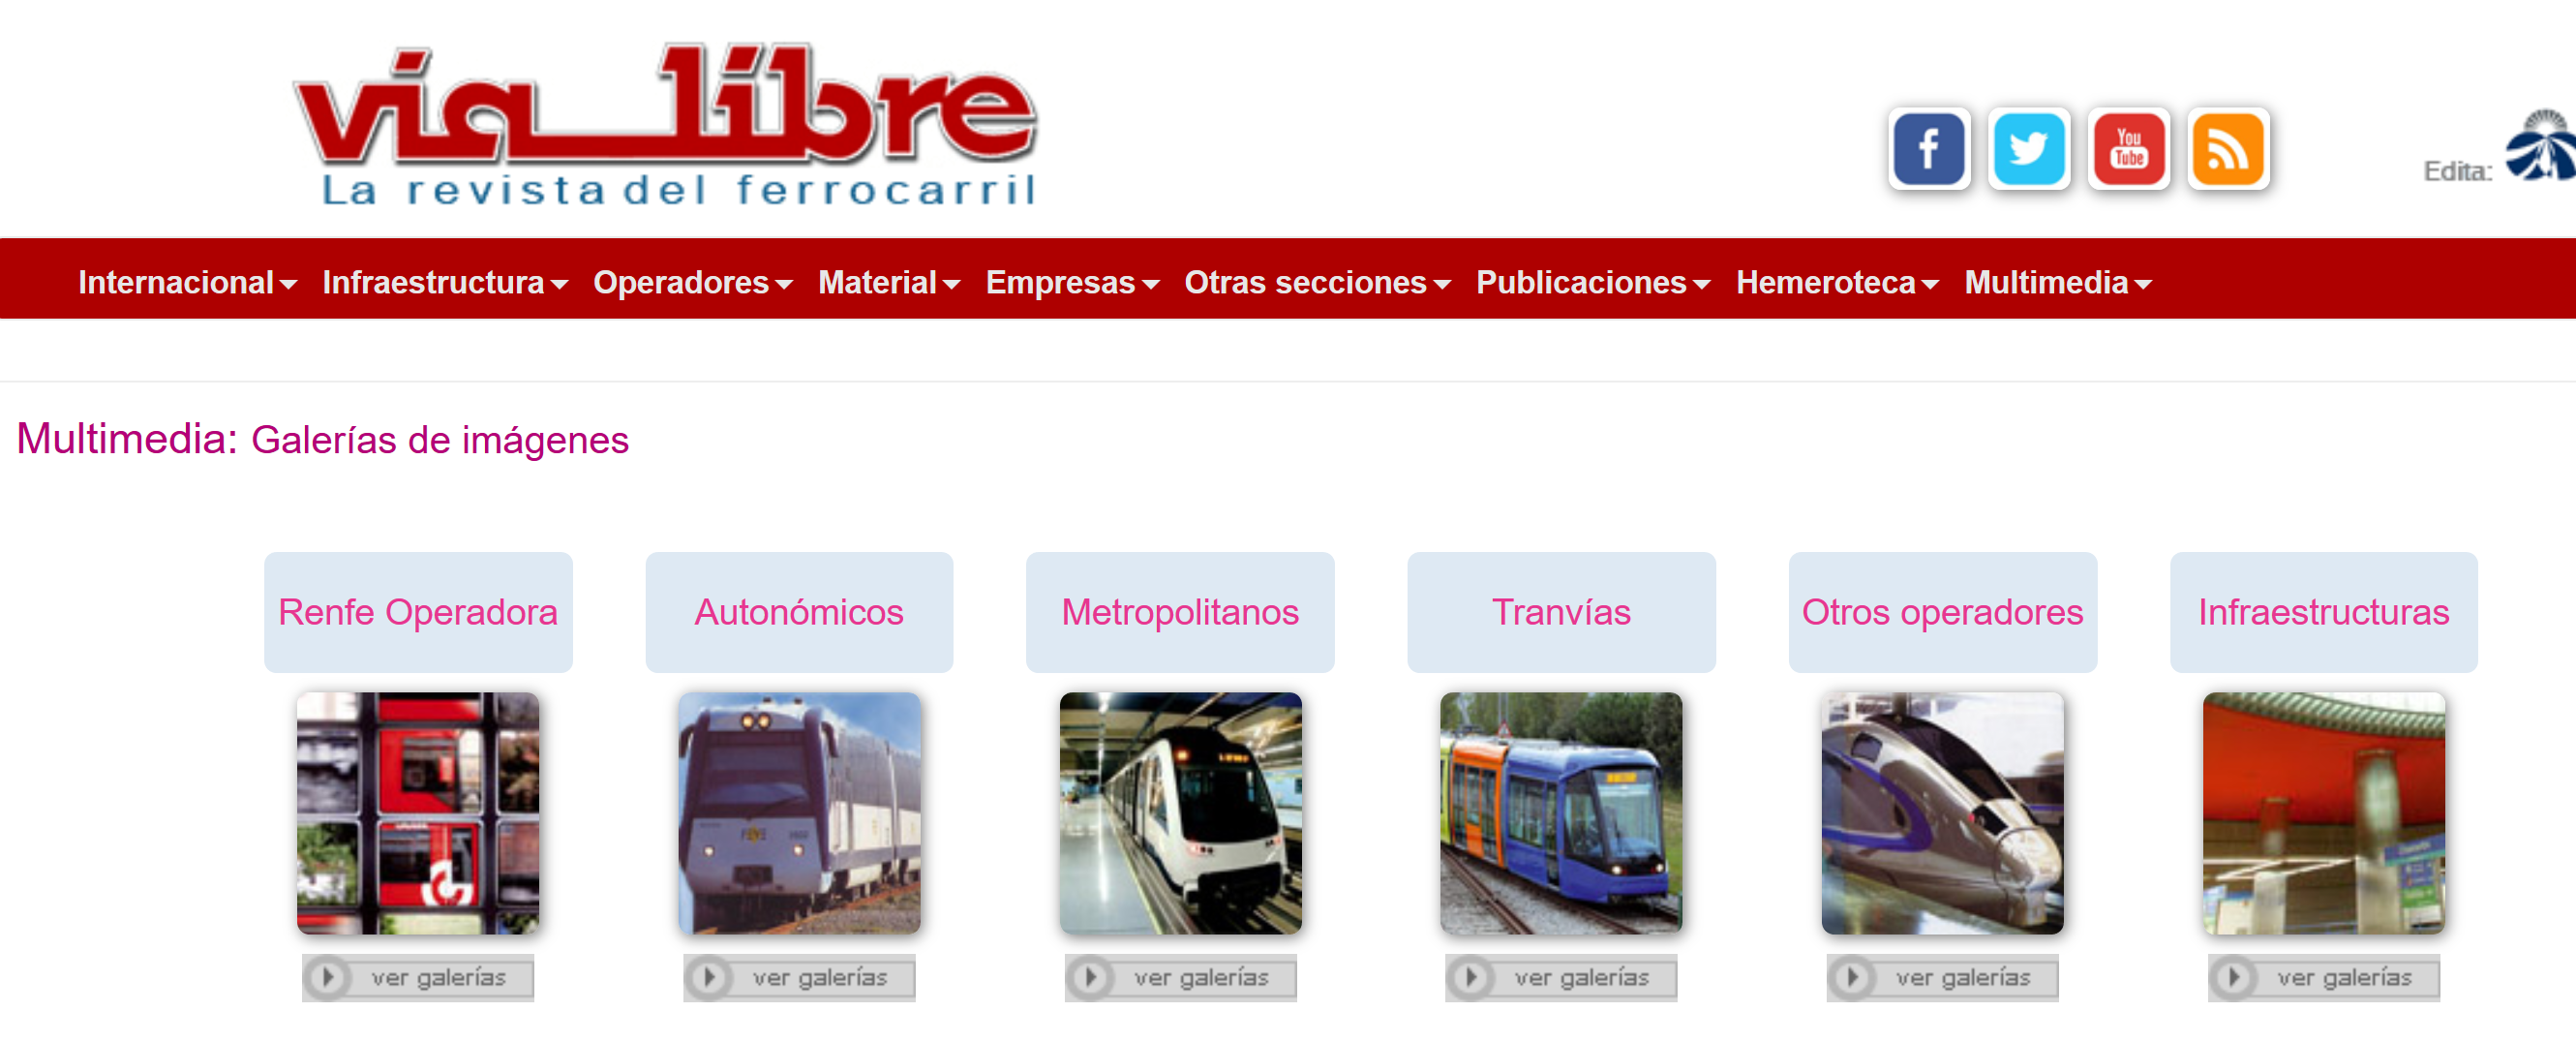

In [17]:
from IPython.display import Image
Image(filename='Captura1.png')
#for i in range(1,4):
#    Image(filename='Captura'+str(i)+'.png')

Las imágenes contenidas en dicha página se pueden encontrar en las etiquetas __&lt;li> &lt;img ...__ que son hijas de la etiqueta __&lt;ul class="pgwSlideshow">__. Por ejemplo en la página de ejemplo, la primera imagen de dicha página es:

   __&lt;li>&lt;img src="multimedia/galerias/IRUN120/2Alvia_120.jpg" alt="" data-description="">&lt;/li>__
   
A continuación, se puede ver el contenido html de esa página.

In [12]:
import requests
url="https://www.vialibre-ffe.com/multi_galeria.asp?gal=524"
r = requests.get(url)
html = r.text
print(html)

<!DOCTYPE html>
<html lang="es">
<head>

<script>
  (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
  (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
  m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
  })(window,document,'script','//www.google-analytics.com/analytics.js','ga');
 
  ga('create', 'UA-70002107-1', 'auto', {'allowLinker': true});
  ga('require', 'linker');
  ga('linker:autoLink', ['www.vialibre.org', 'www.vialibre-ffe.es'] );
  ga('send', 'pageview');

</script>

<META HTTP-EQUIV="Content-Type" CONTENT="text/html; charset=iso-8859-1">

<META NAME="Keywords" CONTENT="Vía  Libre, locomotora, vagón, infraestructura ferroviaria, alta velocidad, material rodante, mercancías, viajeros, metro, tranvía, ferrocarril, tren-tram, estaciones, red, modelismo, intermodal, interoperabilidad, transporte, historia, tecnología, investigación">
<META NAME="language" CONTENT="ES"> 
<META NAME="Revisit"

Se pide:

 1. Crear un programa en __Python__ que muestre un menú con los grupos de fotos, y que pregunte al usuario que grupo de fotos quiere visitar. Se puede asociar a cada grupo un número, y solicitar al usuario que introduzca por teclado el número del grupo. A continuación, se mostrará los subgrupos de ese grupo, y se le preguntará nuevamente al usuario que subgrupo de fotos quiere procesar. Igual que antes, se puede asociar a cada subgrupo un número, y que introduzca por teclado el número del subgrupo. Como resultado se creará un directorio en el disco local para el subgrupo elegido y en el directorio se bajarán las imágenes de los trenes. Se imprimirá por pantalla las urls de las imágenes que se están bajando. Toda la información utilizada en el programa, debe ser extraida de las páginas consideradas usando BeautifulSoup[6 puntos]
 
 2. Crear un minibuscador en __Python__ que pregunte al usuario un conjunto de palabras clave, y  recorra el sitio web buscando todos los subgrupos en cuyo título aparezca alguna de las palabras claves. Como resultado debe mostrar los subgrupos encontrados, listando el nombre y la url de cada subgrupo [4 puntos]

# Normas de entrega

* Fecha tope de entrega: 18/11/2017
* La entrega se realizará subiendo al campus virtual un notebook de Jupyter con la solución. El archivo tendrá como nombre WebScraping_GrupoX donde X será el número de grupo correspondiente.


In [18]:
import urllib.request
from bs4 import BeautifulSoup
html=urllib.request.urlopen("https://www.vialibre-ffe.com/multi_foto.asp?cs=mult")
soup=BeautifulSoup(html.read(),'html.parser')
primero=soup.find_all("a")
for etiqueta in primero:
    nom = etiqueta.get("href",None)

#
index.asp
que_es_vialibre.asp
indice_enlaces.asp
contacto.asp
http://www.vialibre.org/
https://www.facebook.com/pages/V%C3%ADa-Libre-La-revista-del-ferrocarril/592265530793039
https://twitter.com/revistavialibre
https://www.youtube.com/user/RevistaViaLibre
http://www.vialibre.org/rssvialibre.asp
/portada_inte.asp?cs=inte
/portada_inte.asp?cs=inte
/indice_art_inte.asp?cs=inte
/portada_infr.asp?cs=infr
/portada_infr.asp?cs=infr
/indice_art_infr.asp?cs=infr
/inf_guia_adm.asp?cs=infr
/portada_oper.asp?cs=oper
/portada_oper.asp?cs=oper
/indice_art_oper.asp?cs=oper
/oper_guia_oper.asp?cs=oper
/portada_mate.asp?cs=mate
/portada_mate.asp?cs=mate
/indice_art_mate.asp?cs=mate
/mate_servicio.asp?cs=mate
/mate_servicio.asp?cat=ms01
/mate_servicio.asp?cat=ms03
/mate_servicio.asp?cat=ms04
/mate_servicio.asp?cat=ms05
/portada_empr.asp?cs=empr
/portada_empr.asp?cs=empr
/indice_art_empr.asp?cs=empr
/emp_guiaemp.asp?cs=empr
/emp_guia_org.asp?cs=empr
/productos_estrella.asp?cs=empr
/emp_protas.asp?cs=e

In [6]:
import urllib